[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/zdemeo/2d_heat_transfer_python/HEAD?labpath=2d_steady_state.ipynb)

In [ ]:
from lib.Plate import Plate
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
%matplotlib notebook

In [3]:
def animate(i):
    ax.clear()
    plt.contourf(plate.grids[i], 8, cmap='rainbow')
    ax.set_title('n = %d' % (i+1,))

    # i == 0 seems to happen twice, so add colorbar when i == 1
    if i == 1:
        plt.colorbar(label='Temperature')

In [3]:
class Plate:

	def __init__(self, **kwargs):

		import numpy as np

		self.grids = []

		self.iterations = kwargs['iter']

		self.xmax = kwargs['xmax']
		self.ymax = kwargs['ymax']

		self.top = kwargs['top']
		self.bottom = kwargs['bottom']
		self.left = kwargs['left']
		self.right = kwargs['right']

		self.initial_temp = kwargs['initial_temp']

		self.grid = np.zeros((self.xmax, self.ymax))

	def solve(self):
		"""
		Compute the steady-state temperature distribution of the plate.
		Finite-Difference Formulation of Differential Equation
		"""

		import time

		# Manually set boundary temperatures
		self.grid[0, :] = self.top
		self.grid[-1, :] = self.bottom
		self.grid[:, 0] = self.left
		self.grid[:, -1] = self.right

		start = time.time()

		# Take the average temperature of each node's neighbors. More iterations = more accurate solution
		for n in range(self.iterations):
			self.grid[1:-1, 1:-1] = 0.25*(self.grid[:-2, 1:-1] + self.grid[2:, 1:-1] + self.grid[1:-1, :-2] + self.grid[1:-1, 2:])
			#print(self.grid)
			self.grids.append(self.grid.copy())

		# Manually calculate the temperature at the corners
		self.grid[0, 0] = 0.5 * (self.grid[1, 0] + self.grid[0, 1])  # Upper left
		self.grid[-1, 0] = 0.5 * (self.grid[-2, 0] + self.grid[-1, 1])  # Lower left
		self.grid[0, -1] = 0.5 * (self.grid[0, -2] + self.grid[1, -1])  # Upper right
		self.grid[-1, -1] = 0.5 * (self.grid[-1, -2] + self.grid[-2, -1])  # Lower right

		end = time.time() - start

		print('Time elapsed: {time} s'.format(time=end))

Time elapsed: 0.003000497817993164 s


<IPython.core.display.Javascript object>


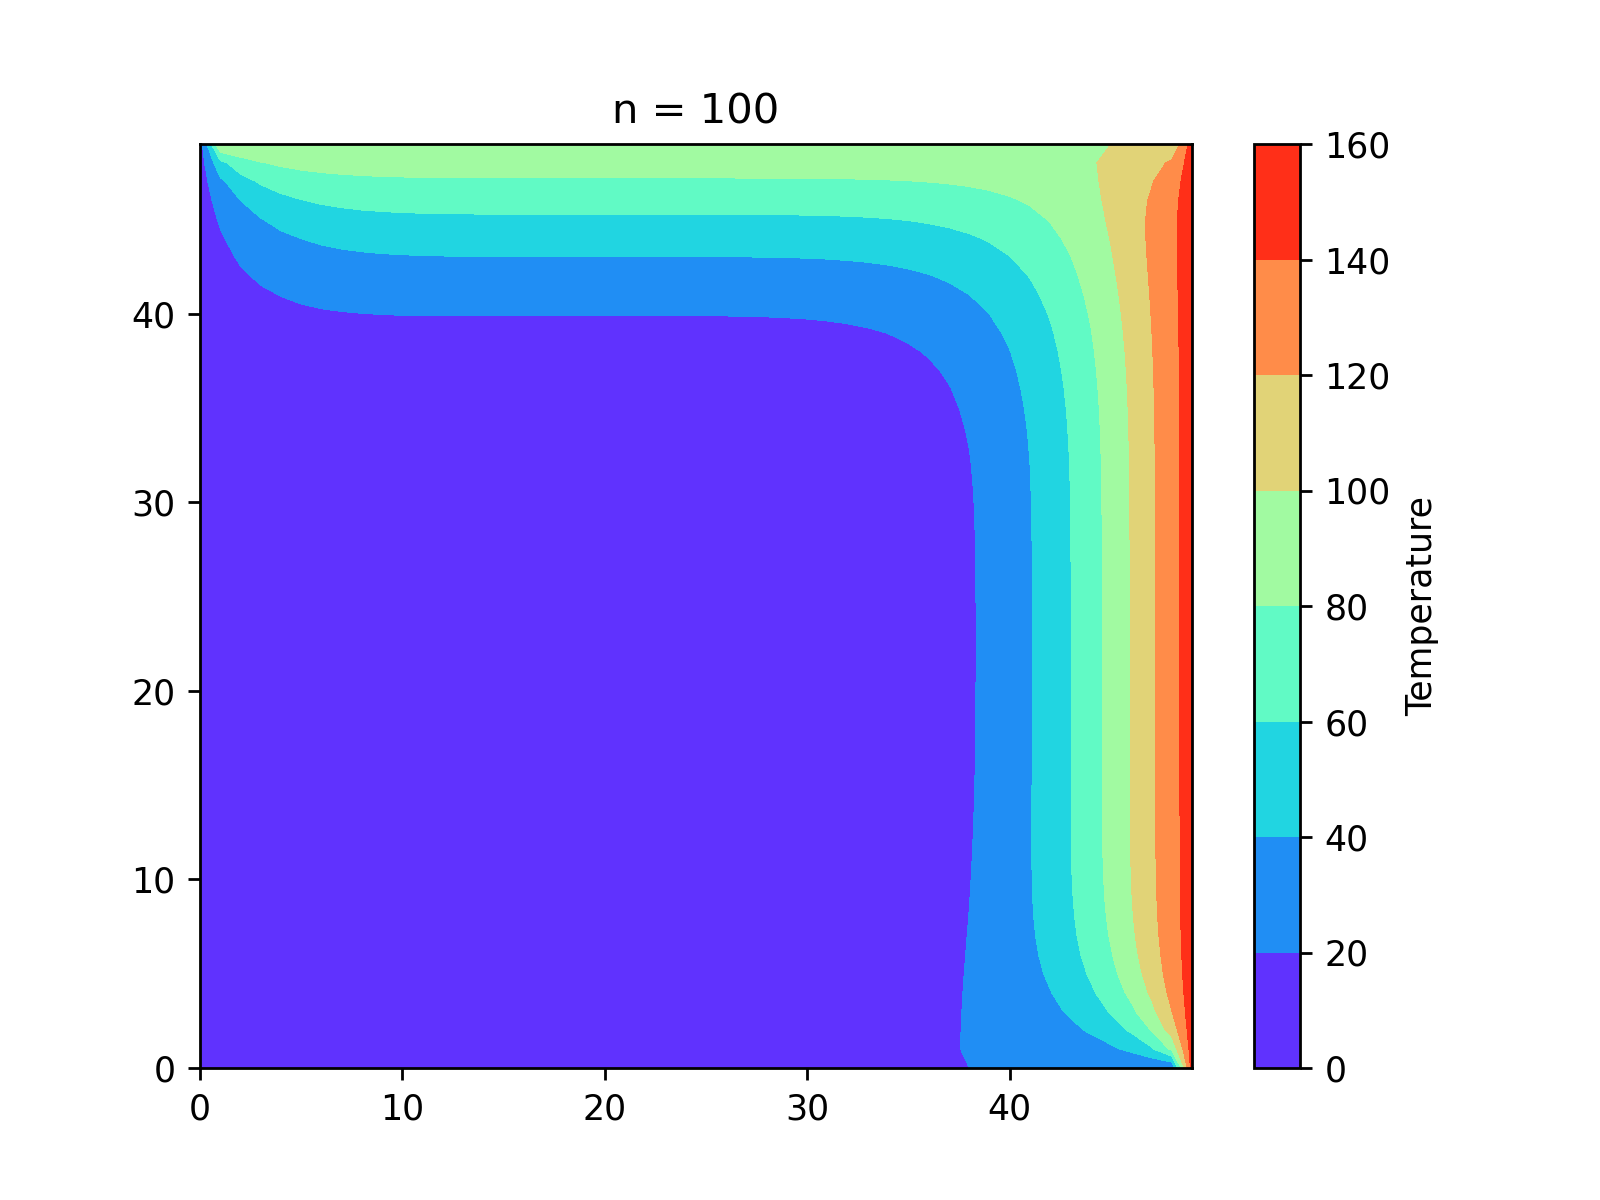

In [5]:
iterations = 100

plate = Plate(xmax=50, ymax=50, top=20, bottom=100, left=10, right=150, initial_temp=20, iter=iterations)
plate.solve()

fig, ax = plt.subplots()

ani = animation.FuncAnimation(fig, animate, iterations, interval=10, blit=False, repeat=False)

plt.show()